In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import os
import warnings



In [2]:
# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('data/modified_utc_dataset.csv')
print(data.head(4))

   Duration Protocol Direction State  Source_Type_of_Service  \
0  1.026539      tcp        ->  S_RA                     0.0   
1  1.009595      tcp        ->  S_RA                     0.0   
2  3.056586      tcp        ->  SR_A                     0.0   
3  3.111769      tcp        ->  SR_A                     0.0   

   Destination_Type_of_Service  Total_Packets  Total_Bytes  Source_Bytes  \
0                          0.0              4          276           156   
1                          0.0              4          276           156   
2                          0.0              3          182           122   
3                          0.0              3          182           122   

                                    Label  
0  flow=Background-Established-cmpgw-CVUT  
1  flow=Background-Established-cmpgw-CVUT  
2             flow=Background-TCP-Attempt  
3             flow=Background-TCP-Attempt  


In [4]:
# we have seen that our data has 10 columns
print(data.dtypes)

Duration                       float64
Protocol                        object
Direction                       object
State                           object
Source_Type_of_Service         float64
Destination_Type_of_Service    float64
Total_Packets                    int64
Total_Bytes                      int64
Source_Bytes                     int64
Label                           object
dtype: object


In [5]:
print(data.head(4).info)

<bound method DataFrame.info of    Duration Protocol Direction State  Source_Type_of_Service  \
0  1.026539      tcp        ->  S_RA                     0.0   
1  1.009595      tcp        ->  S_RA                     0.0   
2  3.056586      tcp        ->  SR_A                     0.0   
3  3.111769      tcp        ->  SR_A                     0.0   

   Destination_Type_of_Service  Total_Packets  Total_Bytes  Source_Bytes  \
0                          0.0              4          276           156   
1                          0.0              4          276           156   
2                          0.0              3          182           122   
3                          0.0              3          182           122   

                                    Label  
0  flow=Background-Established-cmpgw-CVUT  
1  flow=Background-Established-cmpgw-CVUT  
2             flow=Background-TCP-Attempt  
3             flow=Background-TCP-Attempt  >


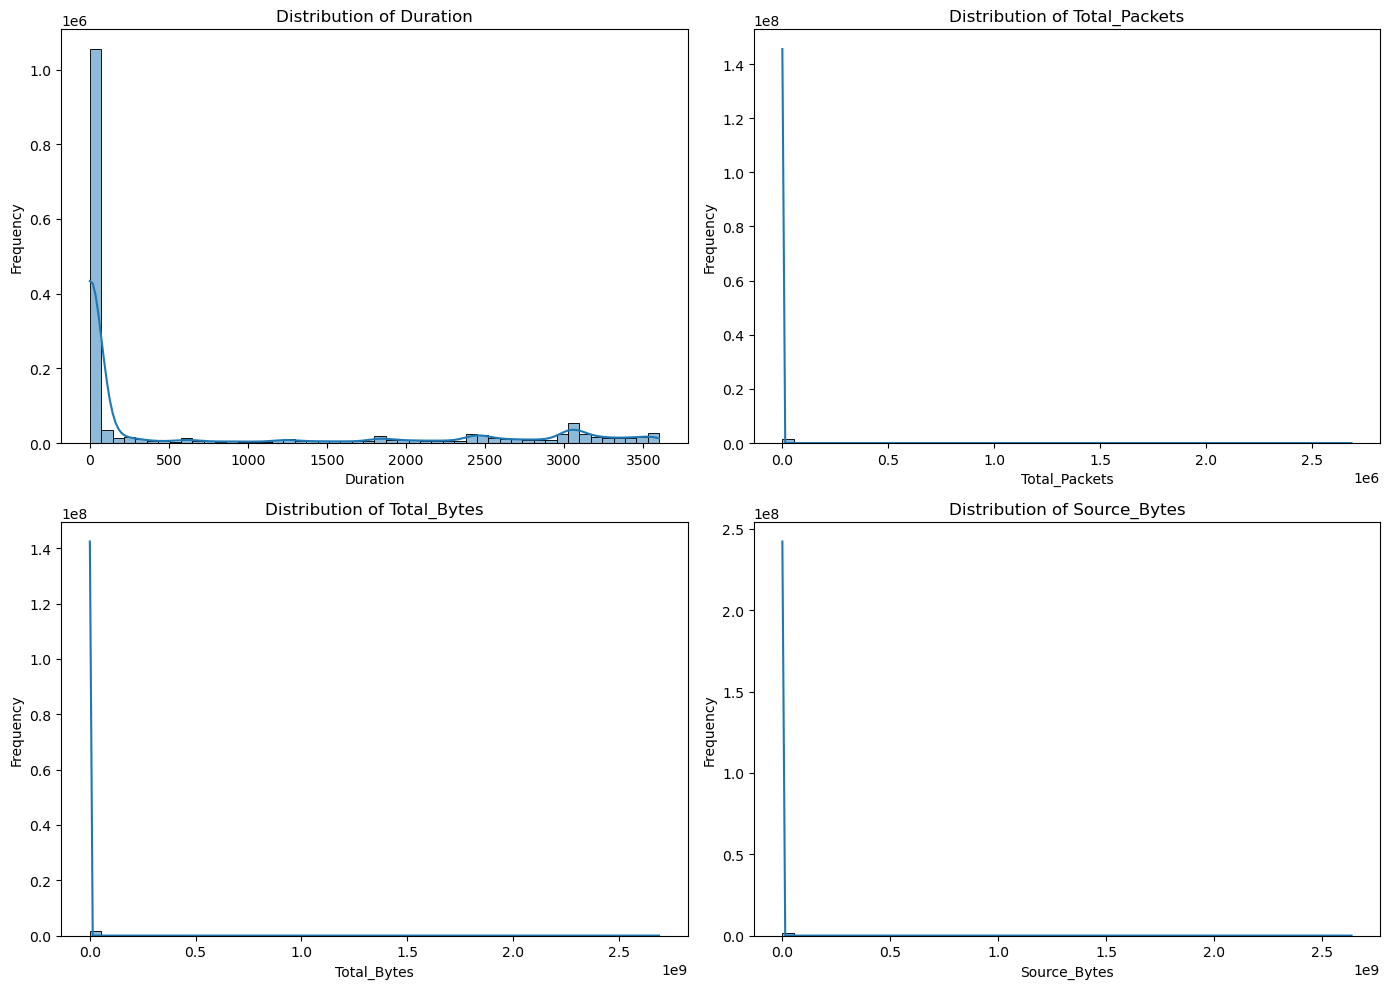

In [6]:
# List of columns to visualize
columns_to_visualize = ['Duration', 'Total_Packets', 'Total_Bytes', 'Source_Bytes']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(columns_to_visualize):
    sns.histplot(data[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


The distribution of all features suggests that the data is rightly skewed. Those features might also correlate with one another since the duration of someone's internet usage affects the total packets and also the total bytes. 


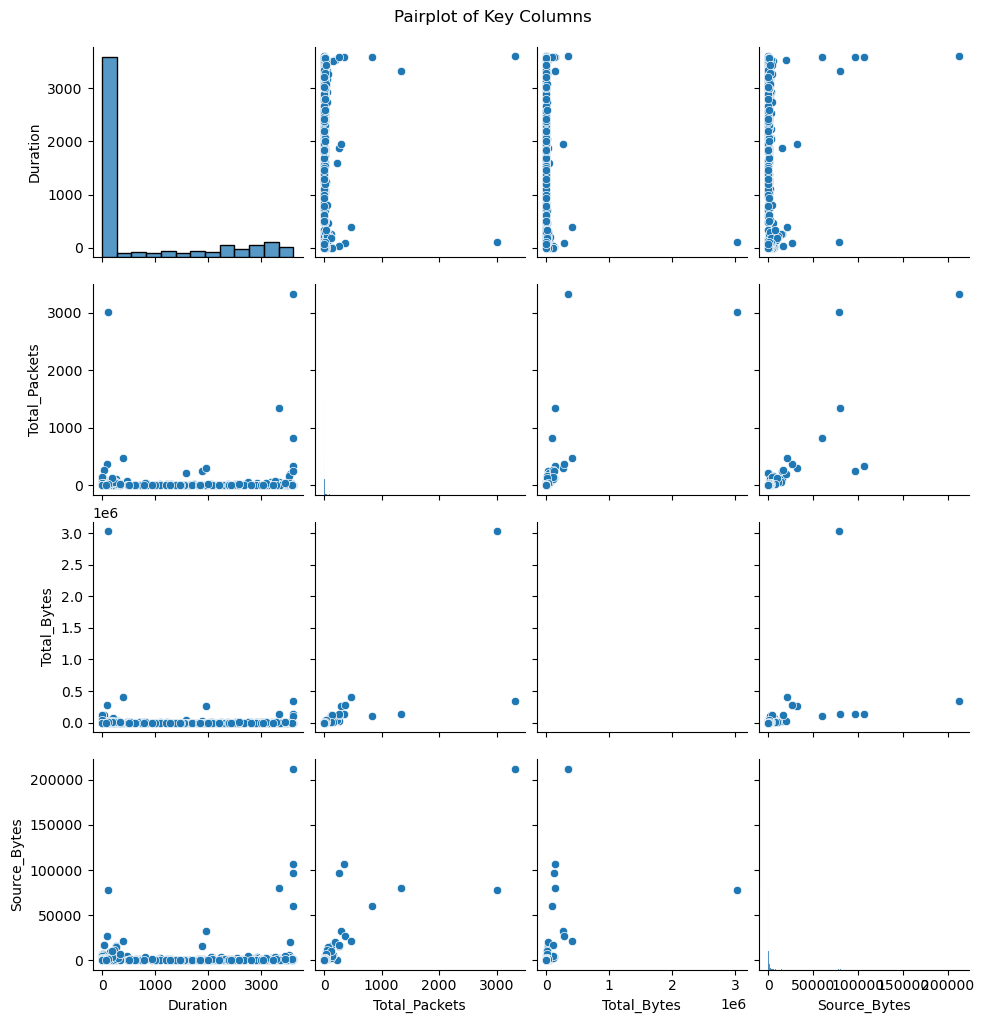

In [7]:
sampled_data = data.sample(n=1000, random_state=42)

sns.pairplot(sampled_data[columns_to_visualize])
plt.suptitle('Pairplot of Key Columns', y=1.02)
plt.show()


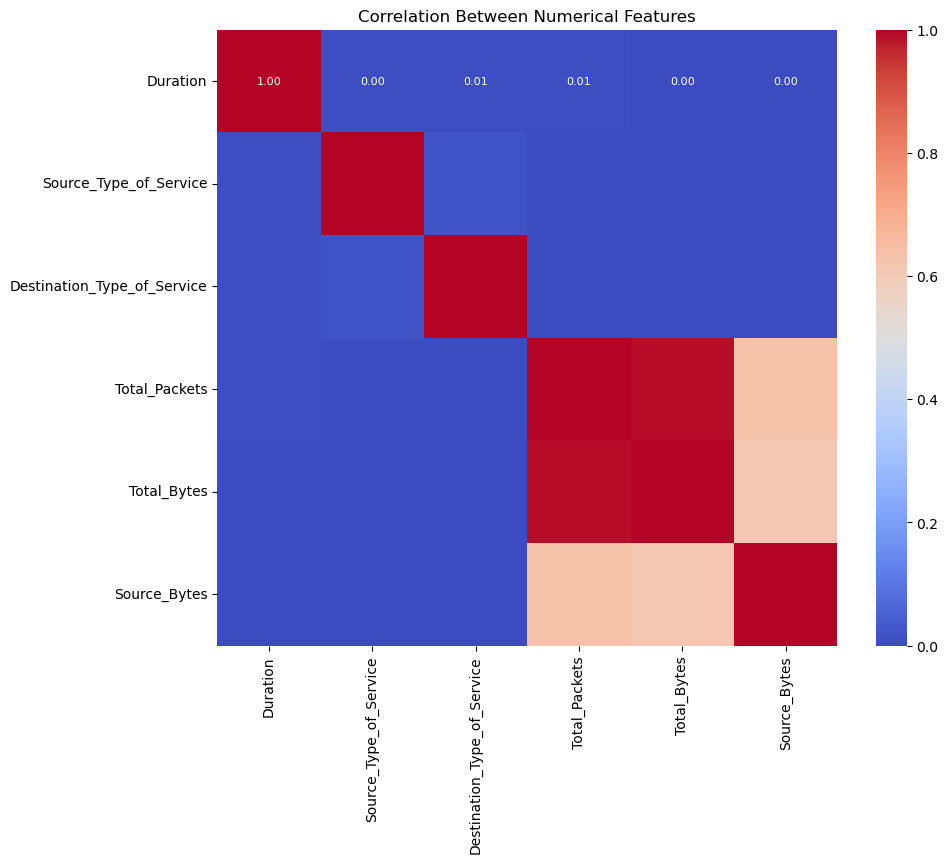

In [11]:
numerical_df = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Between Numerical Features')
plt.show()


From the correlation histogram, we found out that only total packet, total bytes, and source bytes have a correlation. The duration, the destination and the source had zero correlation which is important for building a model. 

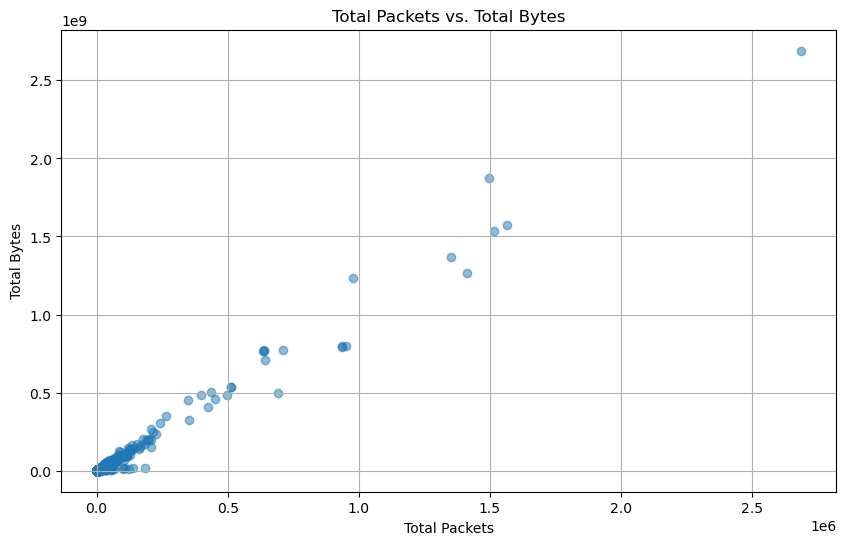

In [9]:
# Plot total packets vs. total bytes
plt.figure(figsize=(10, 6))
plt.scatter(data['Total_Packets'], data['Total_Bytes'], alpha=0.5)
plt.title('Total Packets vs. Total Bytes')
plt.xlabel('Total Packets')
plt.ylabel('Total Bytes')
plt.grid(True)
plt.show()


# Initial Observations

1. **Data Structure**: The dataset contains 10 columns and each column appears to be relevant for network traffic analysis.
2. **Missing Values**: There are no missing values in the dataset, indicating data completeness.
3. **Data Types**: The data types of each column are appropriate, with numerical columns correctly identified.
4. **Distribution of Key Columns**:
   - The 'Duration' column has a right-skewed distribution, indicating most flows are short-lived.
   - The 'Total_Packets' and 'Total_Bytes' columns also show right-skewed distributions.
5. **Categorical Columns**: 
   - The 'Protocol' column is dominated by TCP traffic.
   - The 'State' column shows various network states with some states being more common.
6. **Correlation**: The correlation matrix reveals relationships between numerical columns, with some columns showing strong correlations (e.g., 'Total_Packets' and 'Total_Bytes').

Further exploration and analysis will help in identifying patterns and potential anomalies in the network traffic data.
